# Convolution Nets for MNIST

Deep Learning models can take quite a bit of time to run, particularly if GPU isn't used. 

In the interest of time, you could sample a subset of observations (e.g. $1000$) that are a particular number of your choice (e.g. $6$) and $1000$ observations that aren't that particular number (i.e. $\neq 6$). 

We will build a model using that and see how it performs on the test dataset

In [1]:
#Add following code if you are starting a new notebook in aws sagemaker (delete # before each line of following code before running it)

#import os
#os.system("pip install keras")
#os.system("pip install tensorflow")

In [2]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import Sequential
# Flateen at the end 
from keras.layers.core import Dense, Activation, Flatten

In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D # transformation

In [5]:
from keras.utils import np_utils # categorical vairable
from keras.optimizers import SGD # stochastic grident decent

## Loading Data

In [6]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_test_orig = X_test

## Data Preparation

In [8]:
from keras import backend as K

In [9]:
# Doing some prep for image data example here

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)
    
print(shape_ord)  # Height, Width, and Depth of input image data

# 1 channel

(28, 28, 1)


#### Preprocess and Normalise Data

In [10]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32') # set numeric type
X_test = X_test.astype('float32')

print(np.amax(X_train)) # lets convert the pixel data to a proportion between zero and 1

X_train /= 255 # /= takes X_train and divides by 255
X_test /= 255  # /= takes X_test and divides by 255

255.0


In [11]:
np.random.seed(1338)  # for reproducibilty!!

# Test data
X_test = X_test.copy()
Y = y_test.copy()

# Converting the output to binary classification(Six=1,Not Six=0)
Y_test = Y == 6
Y_test = Y_test.astype(int)

# Selecting the 5918 examples where the output is 6
X_six = X_train[y_train == 6].copy()
Y_six = y_train[y_train == 6].copy()

# Selecting the examples where the output is not 6
X_not_six = X_train[y_train != 6].copy()
Y_not_six = y_train[y_train != 6].copy()

# Selecting 6000 random examples from the data that 
# only contains the data where the output is not 6
random_rows = np.random.randint(0,X_six.shape[0],6000)
X_not_six = X_not_six[random_rows]
Y_not_six = Y_not_six[random_rows]

In [12]:
# Appending the data with output as 6 and data with output as <> 6
X_train = np.append(X_six,X_not_six)

# Reshaping the appended data to appropraite form
X_train = X_train.reshape((X_six.shape[0] + X_not_six.shape[0],) + shape_ord)

# Appending the labels and converting the labels to 
# binary classification(Six=1,Not Six=0)
Y_labels = np.append(Y_six,Y_not_six)
Y_train = Y_labels == 6 
Y_train = Y_train.astype(int)

print(Y_train[::1000]) #now binary DV with zeroes indicating not six

[1 1 1 1 1 1 0 0 0 0 0 0]


In [13]:
print(X_train.shape, Y_labels.shape, X_test.shape, Y_test.shape) # samples, N for obs. rows, N for obs. cols 
                                                                 # and nmbr of channels


(11918, 28, 28, 1) (11918,) (10000, 28, 28, 1) (10000,)


In [14]:
# Converting the classes to its binary categorical form (i.e.-one hot encoding, so its in a structure keras accepts)
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

Y_train.shape
Y_test.shape

(10000, 2)

In [20]:
# test
model = Sequential()

model.add(Conv2D(16, (3, 3),activation='relu', input_shape=shape_ord))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(28, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())

model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, batch_size=64, 
                 epochs=5, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/5
11918/11918 [==============================] - 3s 211us/step - loss: 0.5335 - acc: 0.8635 - val_loss: 0.3566 - val_acc: 0.9316
Epoch 2/5
11918/11918 [==============================] - 2s 191us/step - loss: 0.2118 - acc: 0.9538 - val_loss: 0.1725 - val_acc: 0.9503
Epoch 3/5
11918/11918 [==============================] - 2s 196us/step - loss: 0.1204 - acc: 0.9623 - val_loss: 0.1136 - val_acc: 0.9656
Epoch 4/5
11918/11918 [==============================] - 2s 197us/step - loss: 0.0928 - acc: 0.9681 - val_loss: 0.0727 - val_acc: 0.9761
Epoch 5/5
11918/11918 [==============================] - 2s 199us/step - loss: 0.0785 - acc: 0.9728 - val_loss: 0.0969 - val_acc: 0.9681


# A simple CNN

In [18]:
# -- Initializing the values for the convolution neural network
# Setting up convolutional layer with 32 filters that are 3 by 3

nb_epoch = 5  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling (2 by 2)
nb_pool = 2
# convolution kernel/filter size (3 by 3)
nb_conv = 3 

# Vanilla SGD to speed up optimization for example 
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#### Step 1: Model Definition

In [16]:
model = Sequential()
# (nb_conv, nb_conv) 3 * 3 filter 
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', # could also add strides=2, default is 1
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax')) #could have set this up using sigmoid and included final Dense(1) layer rather than Dense(2)

#### Step 2: Compile

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [18]:
?Conv2D()

#### Step 3: Fit

In [19]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/5
11918/11918 [==============================] - 2s 173us/step - loss: 0.0599 - acc: 0.9784 - val_loss: 0.0411 - val_acc: 0.9834
Epoch 2/5
11918/11918 [==============================] - 2s 159us/step - loss: 0.0170 - acc: 0.9943 - val_loss: 0.0263 - val_acc: 0.9903
Epoch 3/5
11918/11918 [==============================] - 2s 158us/step - loss: 0.0123 - acc: 0.9956 - val_loss: 0.0349 - val_acc: 0.9881
Epoch 4/5
11918/11918 [==============================] - 2s 158us/step - loss: 0.0066 - acc: 0.9981 - val_loss: 0.0267 - val_acc: 0.9920
Epoch 5/5
11918/11918 [==============================] - 2s 159us/step - loss: 0.0046 - acc: 0.9989 - val_loss: 0.0425 - val_acc: 0.9871


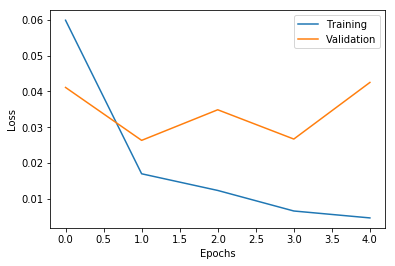

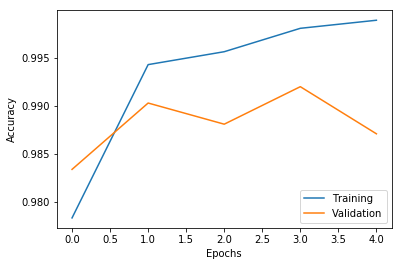

In [20]:
#plot loss and accuracy at each epoch
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

### Step 4: Evaluate

In [21]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'acc']


In [22]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.042504168722961914
Test Accuracy: 0.9871


### Let's plot our model Predictions!

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline

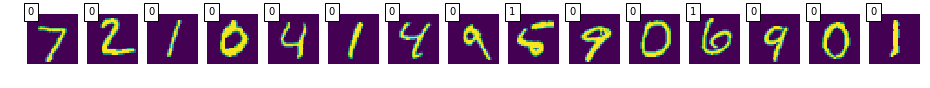

In [24]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1) 

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [25]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/5
11918/11918 [==============================] - 4s 368us/step - loss: 0.2258 - acc: 0.9381 - val_loss: 0.1300 - val_acc: 0.9573
Epoch 2/5
11918/11918 [==============================] - 4s 347us/step - loss: 0.0939 - acc: 0.9695 - val_loss: 0.0622 - val_acc: 0.9785
Epoch 3/5
11918/11918 [==============================] - 4s 350us/step - loss: 0.0803 - acc: 0.9731 - val_loss: 0.0760 - val_acc: 0.9722
Epoch 4/5
11918/11918 [==============================] - 4s 352us/step - loss: 0.0728 - acc: 0.9766 - val_loss: 0.0761 - val_acc: 0.9715
Epoch 5/5
11918/11918 [==============================] - 4s 364us/step - loss: 0.0674 - acc: 0.9784 - val_loss: 0.0761 - val_acc: 0.9715


In [27]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.07610149409770965
Test accuracy: 0.9715


# Adding Dropout

In [22]:
from keras.layers import Dropout
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='valid',
                        input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/5
11918/11918 [==============================] - 5s 388us/step - loss: 0.2256 - acc: 0.9375 - val_loss: 0.1355 - val_acc: 0.9527
Epoch 2/5
11918/11918 [==============================] - 5s 382us/step - loss: 0.1026 - acc: 0.9669 - val_loss: 0.0889 - val_acc: 0.9676
Epoch 3/5
11918/11918 [==============================] - 5s 390us/step - loss: 0.0858 - acc: 0.9718 - val_loss: 0.0885 - val_acc: 0.9667
Epoch 4/5
11918/11918 [==============================] - 5s 401us/step - loss: 0.0769 - acc: 0.9742 - val_loss: 0.0582 - val_acc: 0.9780
Epoch 5/5
11918/11918 [==============================] - 5s 405us/step - loss: 0.0682 - acc: 0.9774 - val_loss: 0.0684 - val_acc: 0.9737


In [73]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.08009139729887248
Test accuracy: 0.9684


# Adding more Convolution Layers

In [19]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/5
11918/11918 [==============================] - 10s 822us/step - loss: 0.3554 - acc: 0.8715 - val_loss: 0.1265 - val_acc: 0.9612
Epoch 2/5
11918/11918 [==============================] - 9s 767us/step - loss: 0.1365 - acc: 0.9533 - val_loss: 0.1059 - val_acc: 0.9614
Epoch 3/5
11918/11918 [==============================] - 10s 813us/step - loss: 0.1052 - acc: 0.9645 - val_loss: 0.0656 - val_acc: 0.9761
Epoch 4/5
11918/11918 [==============================] - 10s 830us/step - loss: 0.0949 - acc: 0.9678 - val_loss: 0.0628 - val_acc: 0.9778
Epoch 5/5
11918/11918 [==============================] - 10s 834us/step - loss: 0.0845 - acc: 0.9718 - val_loss: 0.0702 - val_acc: 0.9735


In [21]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.07019544604346156
Test accuracy: 0.9735


# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [77]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [78]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model() # time a single loop of the model in the function. 

Train on 11918 samples, validate on 10000 samples
Epoch 1/5
11918/11918 [==============================] - 24s 2ms/step - loss: 0.4135 - acc: 0.8430 - val_loss: 0.1720 - val_acc: 0.9435
Epoch 2/5
11918/11918 [==============================] - 23s 2ms/step - loss: 0.1460 - acc: 0.9507 - val_loss: 0.1517 - val_acc: 0.9426
Epoch 3/5
11918/11918 [==============================] - 23s 2ms/step - loss: 0.1148 - acc: 0.9607 - val_loss: 0.0868 - val_acc: 0.9674
Epoch 4/5
11918/11918 [==============================] - 23s 2ms/step - loss: 0.0993 - acc: 0.9656 - val_loss: 0.0755 - val_acc: 0.9712
Epoch 5/5
11918/11918 [==============================] - 23s 2ms/step - loss: 0.0898 - acc: 0.9680 - val_loss: 0.0646 - val_acc: 0.9755
Test score: 0.06462142534740269
Test accuracy: 0.9755
1min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


---